# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # print(lat_lng)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [31]:

l = list(lat_lngs)
for i in l:
    print (i)
    print(i[1])
print(list(lat_lngs))
#print (cities)


[]


A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
# OpenWeatherMap API Key
api_key = api_keys.api_key



# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

Mydata={}
"""
I'll store the date this way:
apiData={city: [temp, humidity, windSpd, cloudPercent, lat, lon]}
"""
for city in cities:

# example request
    req = requests.get(base_url + f'&q={city}').json()
    print(req)

# Your code here. A loop maybe? 
    ourList = []
    if (req['cod'])== 200:    
        ourList.append(req['main']['temp'])
        ourList.append(req['main']['humidity'])
        ourList.append(req['wind']['speed'])
        ourList.append(req['clouds']['all'])
        ourList.append(req['coord']['lat'])
        ourList.append(req['coord']['lon'])
        Mydata[city] = ourList
        time.sleep(1.0)
    
#NOTE: API calls can be slow. They can also be limited. Once you have a list try not to rerun all API calls very often. 

{'coord': {'lon': 152.92, 'lat': -31.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48, 'feels_like': 42.35, 'temp_min': 48, 'temp_max': 48, 'pressure': 1013, 'humidity': 96}, 'visibility': 10000, 'wind': {'speed': 8.77, 'deg': 232}, 'clouds': {'all': 0}, 'dt': 1600878582, 'sys': {'type': 3, 'id': 2000886, 'country': 'AU', 'sunrise': 1600889720, 'sunset': 1600933526}, 'timezone': 36000, 'id': 2152659, 'name': 'Port Macquarie', 'cod': 200}
{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.01, 'feels_like': 45.61, 'temp_min': 51.01, 'temp_max': 51.01, 'pressure': 998, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 324, 'gust': 15.99}, 'clouds': {'all': 94}, 'dt': 1600878772, 'sys': {'type': 3, 'id': 2008959, 'country': 'NZ', 'sunrise': 1600885796, 'sunset': 160092980

{'coord': {'lon': -3.98, 'lat': 22.68}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 109.67, 'feels_like': 99.34, 'temp_min': 109.67, 'temp_max': 109.67, 'pressure': 1008, 'humidity': 7, 'sea_level': 1008, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 11.95, 'deg': 125}, 'clouds': {'all': 44}, 'dt': 1600878790, 'sys': {'country': 'ML', 'sunrise': 1600841101, 'sunset': 1600884682}, 'timezone': 0, 'id': 2450173, 'name': 'Taoudenni', 'cod': 200}
{'coord': {'lon': -50.01, 'lat': -24.79}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68.85, 'feels_like': 66.36, 'temp_min': 68.85, 'temp_max': 68.85, 'pressure': 1023, 'humidity': 60, 'sea_level': 1023, 'grnd_level': 912}, 'visibility': 10000, 'wind': {'speed': 6.82, 'deg': 79}, 'clouds': {'all': 63}, 'dt': 1600878574, 'sys': {'country': 'BR', 'sunrise': 1600852082,

{'coord': {'lon': 16.43, 'lat': -28.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 65.84, 'feels_like': 56.64, 'temp_min': 65.84, 'temp_max': 65.84, 'pressure': 1012, 'humidity': 48, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 14.52, 'deg': 165}, 'clouds': {'all': 0}, 'dt': 1600878809, 'sys': {'country': 'NA', 'sunrise': 1600836137, 'sunset': 1600879851}, 'timezone': 7200, 'id': 3354071, 'name': 'Oranjemund', 'cod': 200}
{'coord': {'lon': -70.2, 'lat': -22.09}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 67.89, 'feels_like': 64.17, 'temp_min': 67.89, 'temp_max': 67.89, 'pressure': 1013, 'humidity': 48, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 9003, 'wind': {'speed': 5.59, 'deg': 206}, 'clouds': {'all': 24}, 'dt': 1600878810, 'sys': {'country': 'CL', 'sunrise': 1600856933, 'sunset

{'coord': {'lon': 110.33, 'lat': 1.55}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.42, 'feels_like': 87.82, 'temp_min': 78.01, 'temp_max': 78.8, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 250}, 'clouds': {'all': 40}, 'dt': 1600878828, 'sys': {'type': 1, 'id': 9366, 'country': 'MY', 'sunrise': 1600900046, 'sunset': 1600943638}, 'timezone': 28800, 'id': 1735634, 'name': 'Kuching', 'cod': 200}
{'coord': {'lon': 54.09, 'lat': 17.02}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 86.81, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1005, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 200}, 'clouds': {'all': 90}, 'dt': 1600878829, 'sys': {'type': 1, 'id': 7562, 'country': 'OM', 'sunrise': 1600827164, 'sunset': 1600870752}, 'timezone'

{'coord': {'lon': 55.77, 'lat': -21.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 63.93, 'feels_like': 61.66, 'temp_min': 55.99, 'temp_max': 68, 'pressure': 1018, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 5.77, 'deg': 108}, 'clouds': {'all': 22}, 'dt': 1600878848, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1600826723, 'sunset': 1600870387}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}
{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 40.91, 'feels_like': 36.37, 'temp_min': 39.99, 'temp_max': 42.01, 'pressure': 1005, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 2.21, 'deg': 295}, 'clouds': {'all': 42}, 'dt': 1600878849, 'sys': {'type': 3, 'id': 2031307, 'country': 'AU', 'sunrise': 1600891051, 'sunset': 1600935007}, 't

{'coord': {'lon': -81.21, 'lat': 28.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.58, 'feels_like': 81.1, 'temp_min': 81, 'temp_max': 84.99, 'pressure': 1018, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1600878868, 'sys': {'type': 1, 'id': 5811, 'country': 'US', 'sunrise': 1600859639, 'sunset': 1600903204}, 'timezone': -14400, 'id': 4172445, 'name': 'Seminole', 'cod': 200}
{'coord': {'lon': 42.45, 'lat': 18.39}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 65.25, 'temp_min': 77, 'temp_max': 77, 'pressure': 1021, 'humidity': 14}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 40}, 'clouds': {'all': 66}, 'dt': 1600878869, 'sys': {'type': 1, 'id': 7396, 'country': 'SA', 'sunrise': 1600829957, 'sunset': 1600873544}, 'timezone': 10800, 'i

{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 89.6, 'feels_like': 93.16, 'temp_min': 89.6, 'temp_max': 89.6, 'pressure': 1014, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1600878886, 'sys': {'type': 1, 'id': 8772, 'country': 'BB', 'sunrise': 1600854430, 'sunset': 1600898004}, 'timezone': -14400, 'id': 3374083, 'name': 'Bathsheba', 'cod': 200}
{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.2, 'feels_like': 2.79, 'temp_min': 16.2, 'temp_max': 16.2, 'pressure': 1023, 'humidity': 83, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 13.78, 'deg': 82}, 'clouds': {'all': 78}, 'dt': 1600878888, 'sys': {'country': 'GL', 'sunrise': 1600856411, 'sunset': 1600900746},

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -76.51, 'lat': 38.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.56, 'feels_like': 71.28, 'temp_min': 71.01, 'temp_max': 75.99, 'pressure': 1016, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 290}, 'clouds': {'all': 1}, 'dt': 1600878906, 'sys': {'type': 1, 'id': 5056, 'country': 'US', 'sunrise': 1600858502, 'sunset': 1600902085}, 'timezone': -14400, 'id': 4362001, 'name': 'Mayo', 'cod': 200}
{'coord': {'lon': 17.94, 'lat': -33.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 60.78, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1015, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1600878907, 'sys': {'type': 1, 'id': 1943, 'country': 'ZA', 'sunrise': 1600835758, 'sun

{'coord': {'lon': 93.68, 'lat': 22.92}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.88, 'feels_like': 64.2, 'temp_min': 61.88, 'temp_max': 61.88, 'pressure': 1011, 'humidity': 100, 'sea_level': 1011, 'grnd_level': 836}, 'visibility': 10000, 'wind': {'speed': 2.98, 'deg': 274}, 'clouds': {'all': 100}, 'dt': 1600878926, 'sys': {'country': 'MM', 'sunrise': 1600817657, 'sunset': 1600861260}, 'timezone': 23400, 'id': 1326105, 'name': 'Falam', 'cod': 200}
{'coord': {'lon': 32.41, 'lat': 67.16}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.25, 'feels_like': 38.77, 'temp_min': 45.25, 'temp_max': 45.25, 'pressure': 1002, 'humidity': 76, 'sea_level': 1002, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 6.96, 'deg': 152}, 'clouds': {'all': 94}, 'dt': 1600878725, 'sys': {'country': 'RU', 'sunrise': 1600832169, '

{'coord': {'lon': -46.05, 'lat': 60.92}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 29.3, 'temp_min': 41, 'temp_max': 41, 'pressure': 1016, 'humidity': 25}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 240}, 'clouds': {'all': 40}, 'dt': 1600878946, 'sys': {'type': 1, 'id': 47, 'country': 'GL', 'sunrise': 1600851105, 'sunset': 1600894866}, 'timezone': -7200, 'id': 3421719, 'name': 'Narsaq', 'cod': 200}
{'coord': {'lon': -169.92, 'lat': -19.06}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 70.75, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1013, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 140}, 'clouds': {'all': 100}, 'dt': 1600878723, 'sys': {'type': 1, 'id': 7306, 'country': 'NU', 'sunrise': 1600880860, 'sunset': 1600924553}, 'timezone': -39

{'coord': {'lon': 133.88, 'lat': -23.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.4, 'feels_like': 49.6, 'temp_min': 55.4, 'temp_max': 55.4, 'pressure': 1021, 'humidity': 37}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1600878966, 'sys': {'type': 1, 'id': 9483, 'country': 'AU', 'sunrise': 1600894321, 'sunset': 1600938061}, 'timezone': 34200, 'id': 2077895, 'name': 'Alice Springs', 'cod': 200}
{'coord': {'lon': 31.87, 'lat': -3.02}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.67, 'feels_like': 72.79, 'temp_min': 73.67, 'temp_max': 73.67, 'pressure': 1008, 'humidity': 52, 'sea_level': 1008, 'grnd_level': 877}, 'visibility': 10000, 'wind': {'speed': 4.27, 'deg': 8}, 'clouds': {'all': 40}, 'dt': 1600878967, 'sys': {'country': 'TZ', 'sunrise': 1600832487, 'sunset': 1600876092}

{'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 78.62, 'feels_like': 77.49, 'temp_min': 78.62, 'temp_max': 78.62, 'pressure': 1017, 'humidity': 80, 'sea_level': 1017, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 17.34, 'deg': 70}, 'clouds': {'all': 17}, 'dt': 1600878985, 'sys': {'country': 'PF', 'sunrise': 1600876510, 'sunset': 1600920184}, 'timezone': -36000, 'id': 4034551, 'name': 'Faanui', 'cod': 200}
{'coord': {'lon': -67.79, 'lat': 10.26}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 87.21, 'feels_like': 90.77, 'temp_min': 87.21, 'temp_max': 87.21, 'pressure': 1011, 'humidity': 56, 'sea_level': 1011, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 6.85, 'deg': 155}, 'clouds': {'all': 72}, 'dt': 1600878987, 'sys': {'country': 'VE', 'sunrise': 1600856413, 's

{'coord': {'lon': -54.97, 'lat': -15.97}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 99.9, 'feels_like': 100.65, 'temp_min': 99.9, 'temp_max': 99.9, 'pressure': 1013, 'humidity': 27, 'sea_level': 1013, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 4.38, 'deg': 83}, 'clouds': {'all': 49}, 'dt': 1600878969, 'sys': {'country': 'BR', 'sunrise': 1600853297, 'sunset': 1600896954}, 'timezone': -14400, 'id': 3460355, 'name': 'Jaciara', 'cod': 200}
{'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 69.42, 'feels_like': 70.95, 'temp_min': 69.01, 'temp_max': 69.8, 'pressure': 1019, 'humidity': 73}, 'visibility': 5000, 'wind': {'speed': 3.36, 'deg': 150}, 'clouds': {'all': 40}, 'dt': 1600879006, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1600826248, 'sunset': 1600869906}, 'ti

{'coord': {'lon': 160.7, 'lat': -8.77}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.38, 'feels_like': 83.44, 'temp_min': 77.38, 'temp_max': 77.38, 'pressure': 1009, 'humidity': 83, 'sea_level': 1009, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 4.43, 'deg': 65}, 'clouds': {'all': 41}, 'dt': 1600879026, 'sys': {'country': 'SB', 'sunrise': 1600887937, 'sunset': 1600931575}, 'timezone': 39600, 'id': 2109701, 'name': 'Auki', 'cod': 200}
{'coord': {'lon': -46.03, 'lat': 60.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 29.3, 'temp_min': 41, 'temp_max': 41, 'pressure': 1016, 'humidity': 25}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 240}, 'clouds': {'all': 40}, 'dt': 1600879027, 'sys': {'type': 1, 'id': 47, 'country': 'GL', 'sunrise': 1600851102, 'sunset': 1600894860}, 'ti

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 152.43, 'lat': -3.67}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 79.2, 'feels_like': 83.23, 'temp_min': 79.2, 'temp_max': 79.2, 'pressure': 1009, 'humidity': 68, 'sea_level': 1009, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 4.41, 'deg': 76}, 'clouds': {'all': 28}, 'dt': 1600879045, 'sys': {'country': 'PG', 'sunrise': 1600889933, 'sunset': 1600933547}, 'timezone': 36000, 'id': 2090021, 'name': 'Namatanai', 'cod': 200}
{'coord': {'lon': 20.58, 'lat': 32.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.77, 'feels_like': 81.39, 'temp_min': 77.77, 'temp_max': 77.77, 'pressure': 1017, 'humidity': 58, 'sea_level': 1017, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 0.63, 'deg': 224}, 'clouds': {'all': 0}, 'dt': 1600879046, 'sys': {'c

{'coord': {'lon': 39.83, 'lat': 21.43}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 89.15, 'feels_like': 86.25, 'temp_min': 89.15, 'temp_max': 89.15, 'pressure': 1005, 'humidity': 28, 'sea_level': 1005, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 6.15, 'deg': 335}, 'clouds': {'all': 24}, 'dt': 1600878964, 'sys': {'country': 'SA', 'sunrise': 1600830585, 'sunset': 1600874174}, 'timezone': 10800, 'id': 104515, 'name': 'Makkah al Mukarramah', 'cod': 200}
{'coord': {'lon': 0.9, 'lat': 5.79}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 83.32, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1012, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 220}, 'clouds': {'all': 20}, 'dt': 1600879066, 'sys': {'type': 1, 'id': 1218, 'country': 'GH', 'sunrise': 1600839926, 'sunset': 16008835

{'coord': {'lon': -52.9, 'lat': 65.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 35.01, 'feels_like': 22.84, 'temp_min': 35.01, 'temp_max': 35.01, 'pressure': 1016, 'humidity': 78, 'sea_level': 1016, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 14.47, 'deg': 58}, 'clouds': {'all': 0}, 'dt': 1600879084, 'sys': {'country': 'GL', 'sunrise': 1600852711, 'sunset': 1600896547}, 'timezone': -7200, 'id': 3421982, 'name': 'Maniitsoq', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 153.1, 'lat': -30.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.33, 'feels_like': 51.13, 'temp_min': 51.01, 'temp_max': 55.99, 'pressure': 1013, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 290}, 'clouds': {'all': 5}, 'dt': 1600879086, 'sys': {'type': 1, 'id': 9521, 'country': 'AU', 'sunri

{'coord': {'lon': -73.82, 'lat': -41.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 53.64, 'feels_like': 48.56, 'temp_min': 53.64, 'temp_max': 53.64, 'pressure': 1021, 'humidity': 58, 'sea_level': 1021, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 4.81, 'deg': 238}, 'clouds': {'all': 0}, 'dt': 1600879103, 'sys': {'country': 'CL', 'sunrise': 1600857710, 'sunset': 1600901587}, 'timezone': -10800, 'id': 3899695, 'name': 'Ancud', 'cod': 200}
{'coord': {'lon': 32.08, 'lat': -10.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.3, 'feels_like': 67.5, 'temp_min': 72.3, 'temp_max': 72.3, 'pressure': 1013, 'humidity': 45, 'sea_level': 1013, 'grnd_level': 876}, 'visibility': 10000, 'wind': {'speed': 8.57, 'deg': 157}, 'clouds': {'all': 56}, 'dt': 1600879104, 'sys': {'country': 'ZM', 'sunrise': 1600832427, 'sunset': 1

{'coord': {'lon': -52.1, 'lat': -32.03}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.87, 'feels_like': 63.18, 'temp_min': 64.87, 'temp_max': 64.87, 'pressure': 1022, 'humidity': 72, 'sea_level': 1022, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 6.11, 'deg': 56}, 'clouds': {'all': 75}, 'dt': 1600878864, 'sys': {'country': 'BR', 'sunrise': 1600852556, 'sunset': 1600896318}, 'timezone': -10800, 'id': 3451138, 'name': 'Rio Grande', 'cod': 200}
{'coord': {'lon': 116.85, 'lat': -20.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.29, 'feels_like': 67.98, 'temp_min': 71.29, 'temp_max': 71.29, 'pressure': 1014, 'humidity': 45, 'sea_level': 1014, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.48, 'deg': 180}, 'clouds': {'all': 3}, 'dt': 1600879123, 'sys': {'country': 'AU', 'sunrise': 1600898418, 's

{'coord': {'lon': -120.46, 'lat': 34.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 57.13, 'feels_like': 55.8, 'temp_min': 55.4, 'temp_max': 59, 'pressure': 1018, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 0}, 'clouds': {'all': 1}, 'dt': 1600879007, 'sys': {'type': 1, 'id': 4747, 'country': 'US', 'sunrise': 1600869060, 'sunset': 1600912618}, 'timezone': -25200, 'id': 5367788, 'name': 'Lompoc', 'cod': 200}
{'coord': {'lon': -15.21, 'lat': 64.25}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 42.8, 'feels_like': 27.52, 'temp_min': 42.8, 'temp_max': 42.8, 'pressure': 997, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 20}, 'clouds': {'all': 40}, 'dt': 1600879144, 'sys': {'type': 1, 'id': 76, 'country': 'IS', 'sunrise': 1600843660, 'sunset': 1600887512}, 'timezone': 0, 'id': 263

{'coord': {'lon': 138.02, 'lat': -33.18}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 40.06, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1021, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1600879163, 'sys': {'type': 1, 'id': 9613, 'country': 'AU', 'sunrise': 1600893283, 'sunset': 1600937113}, 'timezone': 34200, 'id': 2063030, 'name': 'Port Pirie', 'cod': 200}
{'coord': {'lon': 152.15, 'lat': -32.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 52.75, 'feels_like': 46.11, 'temp_min': 48.99, 'temp_max': 57, 'pressure': 1013, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1600879164, 'sys': {'type': 1, 'id': 9605, 'country': 'AU', 'sunrise': 1600889897, 'sunset': 1600933718}, 'timezone': 360

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 164.02, 'lat': -20.23}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 72.03, 'feels_like': 70.07, 'temp_min': 72.03, 'temp_max': 72.03, 'pressure': 1014, 'humidity': 78, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 12.71, 'deg': 92}, 'clouds': {'all': 17}, 'dt': 1600879183, 'sys': {'country': 'NC', 'sunrise': 1600887106, 'sunset': 1600930813}, 'timezone': 39600, 'id': 2138555, 'name': 'Poum', 'cod': 200}
{'coord': {'lon': -77.61, 'lat': -11.1}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 68.45, 'feels_like': 65.79, 'temp_min': 68.45, 'temp_max': 68.45, 'pressure': 1016, 'humidity': 65, 'sea_level': 1016, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 8.19, 'deg': 220}, 'clouds': {'all': 49}, 'dt': 1600879185, 'sys':

{'coord': {'lon': 143.12, 'lat': 49.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 46.63, 'feels_like': 43.25, 'temp_min': 46.63, 'temp_max': 46.63, 'pressure': 1026, 'humidity': 86, 'sea_level': 1026, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 3.02, 'deg': 282}, 'clouds': {'all': 30}, 'dt': 1600879202, 'sys': {'country': 'RU', 'sunrise': 1600892204, 'sunset': 1600935744}, 'timezone': 39600, 'id': 2121909, 'name': 'Poronaysk', 'cod': 200}
{'coord': {'lon': -23.71, 'lat': 64.89}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 38.41, 'feels_like': 21.88, 'temp_min': 38.41, 'temp_max': 38.41, 'pressure': 1005, 'humidity': 74, 'sea_level': 1005, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 22.7, 'deg': 13}, 'clouds': {'all': 99}, 'dt': 1600879203, 'sys': {'country': 'IS', 'sunrise': 160084

{'coord': {'lon': -68.59, 'lat': 70.47}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 22.23, 'temp_min': 30.2, 'temp_max': 30.2, 'pressure': 1019, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1600879222, 'sys': {'type': 1, 'id': 776, 'country': 'CA', 'sunrise': 1600856417, 'sunset': 1600900370}, 'timezone': -14400, 'id': 5924351, 'name': 'Clyde River', 'cod': 200}
{'coord': {'lon': -51.99, 'lat': -29.51}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 80.64, 'feels_like': 83.44, 'temp_min': 80.01, 'temp_max': 81, 'pressure': 1020, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 2.13, 'deg': 153}, 'clouds': {'all': 0}, 'dt': 1600879223, 'sys': {'type': 3, 'id': 2009957, 'country': 'BR', 'sunrise': 1600852540, 'sunset': 1600896281}, 'timezone': -108

{'coord': {'lon': -73.12, 'lat': 41.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 70.77, 'feels_like': 67.5, 'temp_min': 69.01, 'temp_max': 72, 'pressure': 1008, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 8.99, 'deg': 306, 'gust': 21}, 'clouds': {'all': 0}, 'dt': 1600879117, 'sys': {'type': 3, 'id': 2004774, 'country': 'US', 'sunrise': 1600857684, 'sunset': 1600901277}, 'timezone': -14400, 'id': 4844309, 'name': 'Torrington', 'cod': 200}
{'coord': {'lon': -15.83, 'lat': 11.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81.57, 'feels_like': 85.05, 'temp_min': 81.57, 'temp_max': 81.57, 'pressure': 1011, 'humidity': 80, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 11.99, 'deg': 265}, 'clouds': {'all': 21}, 'dt': 1600879242, 'sys': {'country': 'GW', 'sunrise': 1600843944, 'sunset': 

{'coord': {'lon': -114.06, 'lat': 27.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.93, 'feels_like': 81.41, 'temp_min': 81.93, 'temp_max': 81.93, 'pressure': 1014, 'humidity': 47, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 6.53, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1600879261, 'sys': {'country': 'MX', 'sunrise': 1600867526, 'sunset': 1600911082}, 'timezone': -21600, 'id': 4021858, 'name': 'Guerrero Negro', 'cod': 200}
{'coord': {'lon': -44.08, 'lat': -6.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 102.24, 'feels_like': 98.29, 'temp_min': 102.24, 'temp_max': 102.24, 'pressure': 1010, 'humidity': 20, 'sea_level': 1010, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 8.93, 'deg': 115}, 'clouds': {'all': 0}, 'dt': 1600879262, 'sys': {'country': 'BR', 'sunrise': 1600850704, 's

{'coord': {'lon': 55.4, 'lat': 25.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 95.94, 'feels_like': 96.39, 'temp_min': 95, 'temp_max': 96.8, 'pressure': 1003, 'humidity': 26}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 30}, 'clouds': {'all': 3}, 'dt': 1600879094, 'sys': {'type': 1, 'id': 7545, 'country': 'AE', 'sunrise': 1600826845, 'sunset': 1600870442}, 'timezone': 14400, 'id': 292672, 'name': 'Sharjah city', 'cod': 200}
{'coord': {'lon': 122.73, 'lat': 14.19}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.12, 'feels_like': 83.88, 'temp_min': 76.12, 'temp_max': 76.12, 'pressure': 1008, 'humidity': 90, 'sea_level': 1008, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 2.55, 'deg': 212}, 'rain': {'1h': 7.5672}, 'clouds': {'all': 99}, 'dt': 1600879281, 'sys': {'country': 'PH', 'sunrise': 160089709

{'coord': {'lon': 89.21, 'lat': 26.52}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.95, 'feels_like': 82.11, 'temp_min': 74.95, 'temp_max': 74.95, 'pressure': 1010, 'humidity': 95, 'sea_level': 1010, 'grnd_level': 1003}, 'visibility': 6428, 'wind': {'speed': 4.05, 'deg': 88}, 'clouds': {'all': 100}, 'dt': 1600879300, 'sys': {'country': 'IN', 'sunrise': 1600818727, 'sunset': 1600862335}, 'timezone': 19800, 'id': 1271965, 'name': 'Fālākāta', 'cod': 200}
{'coord': {'lon': -20.27, 'lat': 63.44}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 42.8, 'feels_like': 35.87, 'temp_min': 42.8, 'temp_max': 42.8, 'pressure': 997, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 320}, 'clouds': {'all': 20}, 'dt': 1600879301, 'sys': {'type': 1, 'id': 93, 'country': 'IS', 'sunrise': 1600844885, 'sunset': 1600888715}, '

{'coord': {'lon': -61.73, 'lat': 12.16}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 89.6, 'feels_like': 91.76, 'temp_min': 89.6, 'temp_max': 89.6, 'pressure': 1013, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1600879319, 'sys': {'type': 1, 'id': 8781, 'country': 'GD', 'sunrise': 1600854960, 'sunset': 1600898535}, 'timezone': -14400, 'id': 3580279, 'name': 'Gouyave', 'cod': 200}
{'coord': {'lon': -113.06, 'lat': 37.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 58.42, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1026, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 281}, 'clouds': {'all': 1}, 'dt': 1600879138, 'sys': {'type': 1, 'id': 3584, 'country': 'US', 'sunrise': 1600867281, 'sunset': 1600910846}, 'timezone': -216

{'coord': {'lon': -61.38, 'lat': 15.25}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 89.6, 'feels_like': 101.62, 'temp_min': 89.6, 'temp_max': 89.6, 'pressure': 1013, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1600879339, 'sys': {'type': 1, 'id': 8762, 'country': 'DM', 'sunrise': 1600854878, 'sunset': 1600898449}, 'timezone': -14400, 'id': 3575660, 'name': 'Pointe Michel', 'cod': 200}
{'coord': {'lon': -70.1, 'lat': 41.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68.97, 'feels_like': 58.89, 'temp_min': 68, 'temp_max': 69.8, 'pressure': 1008, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 260, 'gust': 23.04}, 'clouds': {'all': 1}, 'dt': 1600879305, 'sys': {'type': 1, 'id': 3218, 'country': 'US', 'sunrise': 1600856959, 'sunset': 160090055

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 111.98, 'lat': 49.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 36.57, 'feels_like': 30.78, 'temp_min': 36.57, 'temp_max': 36.57, 'pressure': 1022, 'humidity': 80, 'sea_level': 1022, 'grnd_level': 915}, 'visibility': 10000, 'wind': {'speed': 3.69, 'deg': 324}, 'clouds': {'all': 0}, 'dt': 1600879360, 'sys': {'country': 'RU', 'sunrise': 1600899685, 'sunset': 1600943207}, 'timezone': 32400, 'id': 2021041, 'name': 'Kyra', 'cod': 200}
{'coord': {'lon': -73.12, 'lat': -36.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.8, 'feels_like': 53.96, 'temp_min': 60.8, 'temp_max': 60.8, 'pressure': 1018, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 240}, 'clouds': {'all': 0}, 'dt': 1600879361, 'sys': {'type': 1, 'id': 8499, 'country': 'CL', 'sunrise': 1

{'coord': {'lon': 19.92, 'lat': -11.78}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 72.39, 'temp_min': 77, 'temp_max': 77, 'pressure': 1009, 'humidity': 24, 'sea_level': 1009, 'grnd_level': 867}, 'visibility': 10000, 'wind': {'speed': 3.4, 'deg': 135}, 'clouds': {'all': 0}, 'dt': 1600879379, 'sys': {'country': 'AO', 'sunrise': 1600835342, 'sunset': 1600878972}, 'timezone': 3600, 'id': 3347719, 'name': 'Luena', 'cod': 200}
{'coord': {'lon': 27.44, 'lat': -32.85}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 67.5, 'temp_min': 68, 'temp_max': 68, 'pressure': 1017, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 60}, 'clouds': {'all': 25}, 'dt': 1600879381, 'sys': {'type': 1, 'id': 1912, 'country': 'ZA', 'sunrise': 1600833481, 'sunset': 1600877224}, 'timezone': 7200, 'id

{'coord': {'lon': 34.84, 'lat': -19.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 71.26, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1020, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 120}, 'clouds': {'all': 0}, 'dt': 1600879399, 'sys': {'type': 1, 'id': 2194, 'country': 'MZ', 'sunrise': 1600831746, 'sunset': 1600875407}, 'timezone': 7200, 'id': 1052373, 'name': 'Beira', 'cod': 200}
{'coord': {'lon': -71.34, 'lat': -29.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 53.6, 'feels_like': 46.96, 'temp_min': 53.6, 'temp_max': 53.6, 'pressure': 1015, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 280}, 'clouds': {'all': 90}, 'dt': 1600879400, 'sys': {'type': 1, 'id': 8514, 'country': 'CL', 'sunrise': 1600857178, 'sunset': 1600900929}, 'timezone': -10800,

{'coord': {'lon': -62.27, 'lat': -38.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 66.11, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1019, 'humidity': 21, 'sea_level': 1019, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 6.35, 'deg': 82}, 'clouds': {'all': 0}, 'dt': 1600879208, 'sys': {'country': 'AR', 'sunrise': 1600854961, 'sunset': 1600898794}, 'timezone': -10800, 'id': 3865086, 'name': 'Bahía Blanca', 'cod': 200}
{'coord': {'lon': -72.07, 'lat': -45.58}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 43.41, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1021, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 240}, 'clouds': {'all': 20}, 'dt': 1600879419, 'sys': {'type': 1, 'id': 8491, 'country': 'CL', 'sunrise': 1600857263, 'sunset': 1600901194}, '

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -137.51, 'lat': 60.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 40.66, 'feels_like': 36.32, 'temp_min': 40.66, 'temp_max': 40.66, 'pressure': 993, 'humidity': 78, 'sea_level': 993, 'grnd_level': 923}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 51}, 'clouds': {'all': 100}, 'dt': 1600879438, 'sys': {'country': 'CA', 'sunrise': 1600873093, 'sunset': 1600916767}, 'timezone': -25200, 'id': 5969025, 'name': 'Haines Junction', 'cod': 200}
{'coord': {'lon': 49.96, 'lat': 52.41}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.54, 'feels_like': 50.22, 'temp_min': 54.54, 'temp_max': 54.54, 'pressure': 1018, 'humidity': 80, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 7.11, 'deg': 29}, 'clouds': {'all': 0}, 'dt': 1600879439, 'sy

{'coord': {'lon': -96.18, 'lat': 38.4}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 67.87, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1019, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 183}, 'clouds': {'all': 90}, 'dt': 1600879458, 'sys': {'type': 1, 'id': 3980, 'country': 'US', 'sunrise': 1600863227, 'sunset': 1600906800}, 'timezone': -18000, 'id': 4271086, 'name': 'Emporia', 'cod': 200}
{'coord': {'lon': 79.92, 'lat': 45.41}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 53.15, 'feels_like': 46.17, 'temp_min': 53.15, 'temp_max': 53.15, 'pressure': 1016, 'humidity': 40, 'sea_level': 1016, 'grnd_level': 926}, 'visibility': 10000, 'wind': {'speed': 5.44, 'deg': 161}, 'clouds': {'all': 20}, 'dt': 1600879459, 'sys': {'country': 'KZ', 'sunrise': 1600820916, 'sunset': 1600864604},

{'coord': {'lon': 47.92, 'lat': 63.37}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 40.06, 'feels_like': 35.04, 'temp_min': 40.06, 'temp_max': 40.06, 'pressure': 1014, 'humidity': 89, 'sea_level': 1014, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 4.03, 'deg': 276}, 'clouds': {'all': 26}, 'dt': 1600879478, 'sys': {'country': 'RU', 'sunrise': 1600828489, 'sunset': 1600872388}, 'timezone': 10800, 'id': 576093, 'name': 'Blagoyevo', 'cod': 200}
{'coord': {'lon': 115.18, 'lat': 33.63}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 63.45, 'feels_like': 64.49, 'temp_min': 63.45, 'temp_max': 63.45, 'pressure': 1016, 'humidity': 81, 'sea_level': 1016, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 250}, 'rain': {'1h': 0.562}, 'clouds': {'all': 0}, 'dt': 1600879479, 'sys': {'country': 'CN', 'su

### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [62]:
#print (Mydata)


weather_df= pd.DataFrame(Mydata)
weather_df= weather_df.transpose()
weather_df.columns=['Temperature (F)','Humidity', 'Wind Speed', 'Cloudiness', 'Lat', 'Long']
weather_df
weather_df.to_csv('weather_data.csv') 



,Temperature (F),Humidity,Wind Speed,Cloudiness,Lat,Long
port macquarie,48.00,96.0,8.77,0.0,-31.43,152.92
mataura,51.01,76.0,7.00,94.0,-46.19,168.86
ishigaki,81.28,71.0,12.84,31.0,24.34,124.16
chokurdakh,36.03,94.0,7.07,81.0,70.63,147.92
xingyi,57.42,95.0,3.29,100.0,24.19,102.82
...,...,...,...,...,...,...
nauta,84.92,75.0,4.76,82.0,-4.51,-73.58
blagoyevo,40.06,89.0,4.03,26.0,63.37,47.92
dancheng,63.45,81.0,2.37,0.0,33.63,115.18
padang,75.79,83.0,4.52,100.0,-0.95,100.35


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

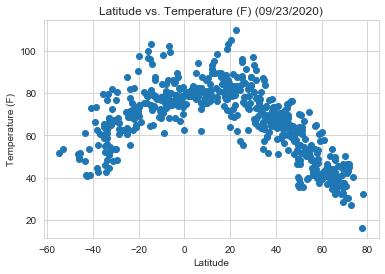

In [80]:
fig, ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Temperature (F)"])
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature (F)")
ax.set_title("Latitude vs. Temperature (F) (09/23/2020)")
plt.show()



#### Latitude vs. Humidity Plot

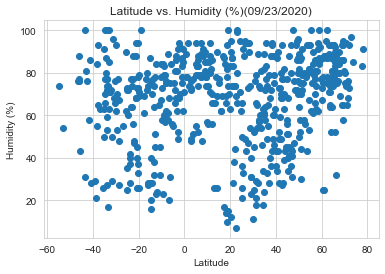

In [81]:
fig, ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Humidity"])
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("Latitude vs. Humidity (%)(09/23/2020)")
plt.show()

#### Latitude vs. Cloudiness Plot

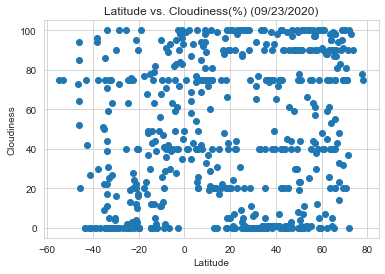

In [83]:
fig, ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Cloudiness"])
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")
ax.set_title("Latitude vs. Cloudiness(%) (09/23/2020)")
plt.show()

#### Latitude vs. Wind Speed Plot

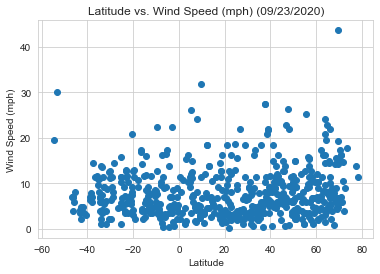

In [84]:
fig, ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Wind Speed"])
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("Latitude vs. Wind Speed (mph) (09/23/2020)")
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

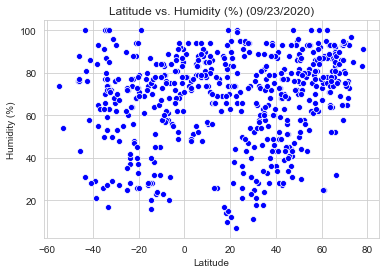

In [85]:
import seaborn as sns
#sns.set_style("whitegrid")
g=sns.scatterplot(x= "Lat", y= "Humidity", data=weather_df, color= "b")
g.set_title("Latitude vs. Humidity (%) (09/23/2020)")
g.set(xlabel= "Latitude", ylabel="Humidity (%)")
plt.show()

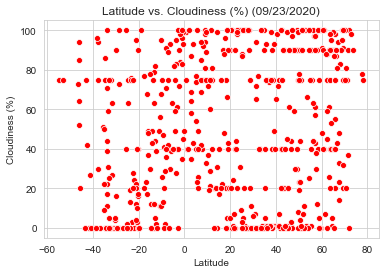

In [86]:
sns.set_style("whitegrid")
g=sns.scatterplot(x= "Lat", y= "Cloudiness", data=weather_df, color= "red")
g.set_title("Latitude vs. Cloudiness (%) (09/23/2020)")
g.set(xlabel= "Latitude", ylabel="Cloudiness (%)")
plt.show()

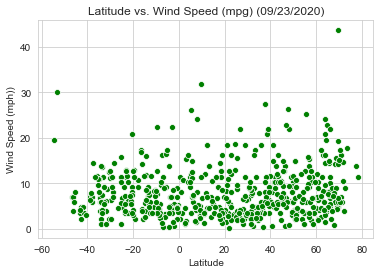

In [87]:
sns.set_style("whitegrid")
g=sns.scatterplot(x= "Lat", y= "Wind Speed", data=weather_df, color= "g")
g.set_title("Latitude vs. Wind Speed (mpg) (09/23/2020)")
g.set(xlabel= "Latitude", ylabel="Wind Speed (mph))")
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

In [79]:
# There is a curvilinear relationship between latitude and temperature. 
# The closer the latitude is to 0 the higher tempearture, which the closer to the equator the higher the temperature
#There are no visible relationships between latitude and humidity, latitude and cloudiness or latitude and wind speed

R=weather_df.corr()
print(R)

                 Temperature (F)  Humidity  Wind Speed  Cloudiness       Lat  \
Temperature (F)         1.000000 -0.426173   -0.050865   -0.165136 -0.456634   
Humidity               -0.426173  1.000000   -0.005125    0.437602  0.163978   
Wind Speed             -0.050865 -0.005125    1.000000    0.066251  0.097218   
Cloudiness             -0.165136  0.437602    0.066251    1.000000  0.171928   
Lat                    -0.456634  0.163978    0.097218    0.171928  1.000000   
Long                   -0.146687  0.223216   -0.157916    0.104077 -0.089450   

                     Long  
Temperature (F) -0.146687  
Humidity         0.223216  
Wind Speed      -0.157916  
Cloudiness       0.104077  
Lat             -0.089450  
Long             1.000000  


### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 